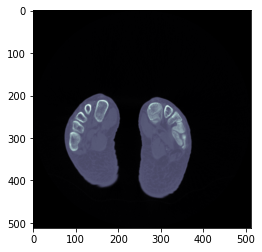

In [1]:
import pydicom
import pylab

ds = pydicom.read_file("F:\\study\\Group-T\\Master\\Thesis\\wetransfer-886411\\test 07 AEP\\test 07 AEP0000.dcm")
##
pixel_bytes = ds.PixelData

##CT值组成了一个矩阵
pix = ds.pixel_array

##读取显示图片
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

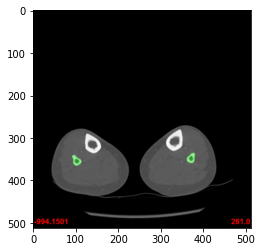

In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt

bmp_filepath = 'F:\\study\\Group-T\\Master\\Thesis\\wetransfer-886411\\test 07 AEP export\\01\\_Axial+0261.0-000.bmp'
bmp = plt.imread(bmp_filepath)
plt.imshow(bmp)
plt.show()
pos = np.unravel_index(np.argmax(bmp),bmp.shape)

#f = open(bmp_filepath,'rb')
# f_type=str(f.read(2)) #这个就可以用来读取 文件类型 需要读取2个字节
# file_size_byte=f.read(4)# 这个可以用来读取文件的大小 需要读取4个字节
# f.seek(f.tell()+4) # 跳过中间无用的四个字节
# file_ofset_byte=f.read(4) # 读取位图数据的偏移量
# f.seek(f.tell()+4) # 跳过无用的两个字节
# file_wide_byte=f.read(4) #读取宽度字节
# file_height_byte=f.read(4) #读取高度字节
# f.seek(f.tell()+2) ## 跳过中间无用的两个字节
# file_bitcount_byte=f.read(4) #得到每个像素占位大小
#
#
# #下面就是将读取的字节转换成指定的类型
# f_size,=struct.unpack('l',file_size_byte)
# f_ofset,=struct.unpack('l',file_ofset_byte)
# f_wide,=struct.unpack('l',file_wide_byte)
# f_height,=struct.unpack('l',file_height_byte)
# f_bitcount,=struct.unpack('i',file_bitcount_byte)
# print("类型:",f_type,"大小:",f_size,"位图数据偏移量:",f_ofset,"宽度:",f_wide,"高度:",f_height,"位图:",f_bitcount)
#

In [3]:
# '然后来读取颜色表'
# color_table=np.empty(shape=[256,4],dtype=int)
# f.seek(54) #跳过文件信息头和位图信息头
# for i in range(0,256):
#     b=struct.unpack('B',f.read(1))[0];
#     g = struct.unpack('B', f.read(1))[0];
#     r = struct.unpack('B', f.read(1))[0];
#     alpha = struct.unpack('B', f.read(1))[0];
#     color_table[i][0]=r
#     color_table[i][1]=g
#     color_table[i][2]=b
#     color_table[i][3]=255
#
# '下面部分用来读取BMP位图数据区域,将数据存入numpy数组'
#  #首先对文件指针进行偏移
# f.seek(f_ofset)
# #因为图像是8位伪彩色图像，所以一个像素点占一个字节，即8位
# img=np.empty(shape=[f_height,f_wide,4],dtype=int)
# cout = 0
# for y in range(0, f_height):
#     for x in range(0,f_wide):
#         cout=cout+1
#         index=struct.unpack('B',f.read(1))[0]
#         img[f_height-y-1,x]=color_table[index]
#     while cout %4 !=0:
#         f.read(1)
#         cout=cout+1
# plt.imshow(img)
# plt.show()
# f.close()

In [4]:
label = np.zeros([512,512])

In [5]:
width = np.size(bmp,0)
height = np.size(bmp,1)

In [6]:
for x in range(width):
    for y in range(height):
        if bmp[x,y,0] < bmp[x,y,1]:
            label[x,y] = 1

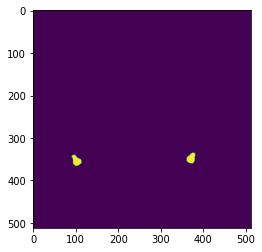

In [7]:
plt.imshow(label)
plt.show()

In [8]:
##这个下次应该就不用跑了
import dicom2nifti
# 多个dicom文件转化为3D nii文件
original_dicom_directory = 'F:/study/Group-T/Master/Thesis/wetransfer-886411/test 07 AEP'
# '0007686236.nii'为要生成的nii文件名
output_file = '0007686236.nii'
dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)

D:\Python3.7\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


{'NII_FILE': '0007686236.nii',
 'NII': <nibabel.nifti1.Nifti1Image at 0x19b5e820208>,
 'MAX_SLICE_INCREMENT': 0.6000000000000001}

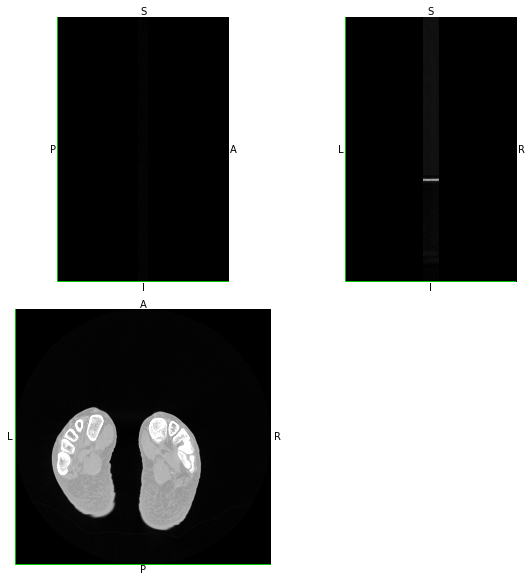

In [9]:
import nibabel as nib
from nibabel.viewers import OrthoSlicer3D
output_file = '0007686236.nii'
img = nib.load(output_file)
OrthoSlicer3D(img.dataobj).show()

In [10]:
width,height,depth=img.dataobj.shape

image_data = img.get_fdata()